<a href="https://colab.research.google.com/github/GALI-SAI-SHANKAR/Threat-Alert-AI/blob/main/Documents/Phase%202/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPROCESSING

*   Data Cleaning
  *   Attribute Mean Method

  ---

*   Data Smoothing
  *   Mean Bin Method     

  ---

*   Data Transformation
  *   Min Max Normalization     



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io 
import pandas as pd 
import numpy as np 
import math
from sklearn import preprocessing

In [3]:
# Upload File
data = files.upload()

Saving Emotion Dataset.csv to Emotion Dataset.csv


In [4]:
# Load the dataset
df = pd.read_csv(io.StringIO(data['Emotion Dataset.csv'].decode('utf-8')))

In [ ]:
print(df.iloc[0])

In [ ]:
# print Dataset
print(df)

In [ ]:
df.head

In [ ]:
df.info()

In [ ]:
df.describe() 

## Data cleaning

#### Checking Null entries

In [34]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         0      1      2      3      4  ...      7      8      9     10  labels
0   False  False  False  False  False  ...  False  False  False  False   False
1   False  False  False  False  False  ...  False  False  False  False   False
2   False  False  False  False  False  ...  False  False  False  False   False
3   False  False  False  False  False  ...  False  False  False  False   False
4   False  False   True  False  False  ...  False  False  False  False   False
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...     ...
61  False  False  False  False  False  ...  False  False  False  False   False
62  False  False  False  False  False  ...  False  False  False  False   False
63  False  False  False  False  False  ...  False  False  False  False   False
64  False  False  False  False  False  ...  False  False  False  False   False
65  False  False  False  False  False  ...  False  False  False  Fals

#### Filling values in place of Null Entries by Mean

In [ ]:
df["0"].fillna(value=df["0"].mean(), inplace = True)

#### Filling values in place of Null Entries by Mode

In [12]:
df["0"].fillna(value=df["0"].mode(), inplace = True)

### Removing Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

## Data Visualization

### Scatter Plot

In [ ]:
plt.figure(figsize=(17,9))

In [ ]:
plt.title("Comparison between various labels based on MCFS values")

sns.scatterplot(df["0"],df["1"],hue =df["labels"],s=50)

## Data Smoothing

* Data smoothing can be performed in three different ways:

  * Bin means: Each value stored in the bin will be replaced by bin means.
  * Bin median: Each value stored in the bin will be replaced by bin median.
  * Bin boundary: The minimum and maximum bin values are stored at the boundary while intermediate bin values are replaced by the boundary value to which it is more closer.

In [ ]:
# Load a column 
data = df['0']

# sort data
data=np.sort(data)
print(data)

In [7]:
# Now, we’ll create three different matrices having 10 rows and 3 columns. These matrices will act as our bin.
b1=np.zeros((10,3)) 
b2=np.zeros((10,3)) 
b3=np.zeros((10,3))

### Mean Bin

In [ ]:

for i in range (0,30,3): 
  k=int(i/3) 
  mean=(data[i] + data[i+1] + data[i+2] )/3
  for j in range(3): 
    b1[k,j]=mean 

print("-----------------Mean Bin:----------------- \n",b1)

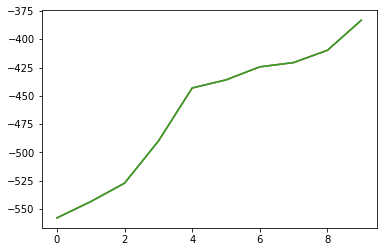

In [24]:
plt.plot(b1)
plt.show()

### Median Bin

In [ ]:
for i in range (0,30,3): 
  k=int(i/3) 
  for j in range (3): 
    b2[k,j]=data[i+1] 
print("-----------------Median Bin :----------------- \n",b2)

In [ ]:
plt.plot(b2)
plt.show()

### Boundary Bin

In [ ]:
for i in range (0,30,3): 
  k=int(i/3) 
  for j in range (3): 
    if (data[i+j]-data[i]) < (data[i+2]-data[i+j]): 
      b3[k,j]=data[i] 
    else: 
      b3[k,j]=data[i+2]   

print("-----------------Boundary Bin:----------------- \n",b3)

In [ ]:
plt.plot(b3)
plt.show()

## Data Transformation : Normalization

Particularly useful for classification (NNs, distance measurements,
nn classification, etc)

In [ ]:
scaler = preprocessing.MinMaxScaler()
names = df.iloc[: , :11].columns
d = scaler.fit_transform(df.iloc[: , :11])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

In [ ]:
plt.plot(scaled_df.head())
plt.legend(names)
plt.show()